In [1]:
from sys import path
import os 
from extraction import extraction
import math
from transformation import transformations
path.append(os.path.realpath("../"))

In [2]:
def extraction_api(path):
    return extraction.get_full_data(math.ceil(extraction.extract(path, 0)["total"]/100))

In [3]:
def transformation(dataframe):
    for i in range(len(dataframe)):
        if dataframe.loc[i, "properties.raw_email"] != None:
            dataframe.loc[i, "Email"] = transformations.exctract_email(dataframe.loc[i, "properties.raw_email"])[0]
            dataframe.loc[i, "Name"] = transformations.exctract_email(dataframe.loc[i, "properties.raw_email"])[1]
        else:
            dataframe.loc[i, "Email"] = ""
            dataframe.loc[i, "Name"] = ""
    dataframe = transformations.Delete_duplicates(dataframe)
    dataframe['Country'] = dataframe["properties.country"].apply(lambda x: transformations.findCountry(x)[0])
    dataframe['City'] = dataframe["properties.country"].apply(lambda x: transformations.findCountry(x)[1])
    dataframe = dataframe.replace("Éire / Ireland", "Ireland") 
    dataframe = transformations.get_phone_number(dataframe)
    return dataframe

In [7]:
if __name__ == '__main__':
    Hubspot_df = extraction_api("https://api.hubapi.com/crm/v3/objects/contacts/search")
    fina_df = transformation(Hubspot_df)
    fina_df.to_csv('resources/output.csv', index = False)




In [10]:
import requests
import json
import os

url = "https://api.hubapi.com/crm/v3/imports"

YOUR_ACCESS_TOKEN = 'pat-na1-7ad0d2dd-1c1d-4bd3-983f-0de488f3520e';

headers = {
  'authorization': 'Bearer %s' % YOUR_ACCESS_TOKEN
}

data = {
  "name": "Contact collection",
  "dateFormat": "DAY_MONTH_YEAR",
  "files": [
    {
      "fileName": "output.csv",
      "fileFormat": "CSV",
      "fileImportPage": {
        "hasHeader": True,
        "columnMappings": [
          {
            "columnObjectTypeId": "0-1",
            "columnName": "Email",
            "propertyName": "Email",
            "idColumnType": None
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "Country",
            "propertyName": "Country/Region",
            "idColumnType": None
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "City",
            "propertyName": "City",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "Industry",
            "propertyName": "Original Industry",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "Phone",
            "propertyName": "Phone Number",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "Phone",
            "propertyName": "Phone Number",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "properties.technical_test___create_date",
            "propertyName": "Original Create Date",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          },
          {
            "columnObjectTypeId": "0-1",
            "columnName": "properties.hs_object_id",
            "propertyName": "Temporary ID",
            "idColumnType": "HUBSPOT_ALTERNATE_ID"
          }
        ]
      }
    }
  ]
}

datastring = json.dumps(data)

payload = {"importRequest": datastring}

current_dir = os.path.dirname(__file__)
relative_path = "./test_import.csv"

absolute_file_path = os.path.join(current_dir, relative_path)

files = [
    ('files', open(absolute_file_path, 'rb'))
]
print(files)

response = requests.request("POST", url, data=payload, files=files, headers=headers)

print(response.text.encode('utf8'))
print(response.status_code)

NameError: name '__file__' is not defined

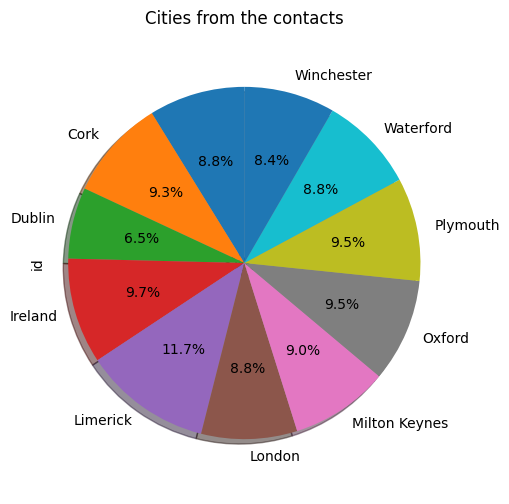

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_countries = fina_df.groupby('City', axis=0).count()
df_countries['id'].plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', 
startangle=90, 
shadow=True,
)
plt.title('Cities from the contacts')
plt.axis('equal') 
plt.show()

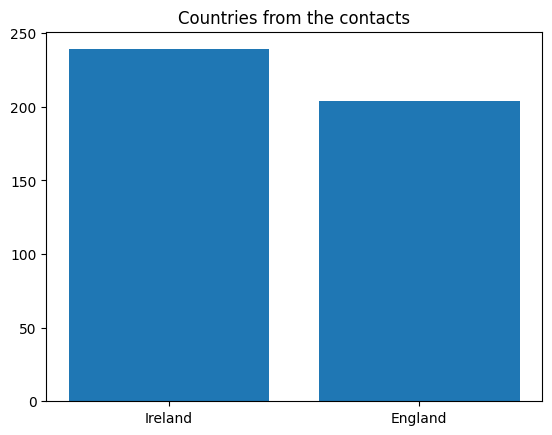

In [9]:
x_values = fina_df['Country'].unique()
y_values = fina_df['Country'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.title('Countries from the contacts')
plt.show()
plt.close('all')